In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from src.auxiliares import dataframe_coeficientes
from src.config import DADOS_TRATADOS
from src.graficos import plot_coeficientes, plot_residuos

sns.set_theme(palette='bright')

RANDOM_STATE = 42

In [2]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [3]:
X = df.drop(columns='target')
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('reg', LinearRegression())
    ]
)

In [6]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [7]:
pipeline.score(X_test, y_test)

0.452602744102478

In [8]:
pipeline.named_steps

{'scaler': StandardScaler(), 'reg': LinearRegression()}

In [11]:
pipeline[1].coef_

array([  1.7537615, -11.511821 ,  25.607111 ,  16.828888 , -44.44886  ,
        24.640951 ,   7.6769834,  13.138799 ,  35.16119  ,   2.3513749],
      dtype=float32)

In [12]:
pipeline[1].intercept_

np.float32(153.73654)

In [14]:
coefs = dataframe_coeficientes(
    pipeline['reg'].coef_,
    X.columns
)

coefs

,coeficiente
colesterol_total,-44.448860
sexo,-11.511821
idade,1.753762
glicose,2.351375
hdl,7.676983
colesterol_hdl,13.138799
pressao_media,16.828888
ldl,24.640951
imc,25.607111
triglicerides,35.161190


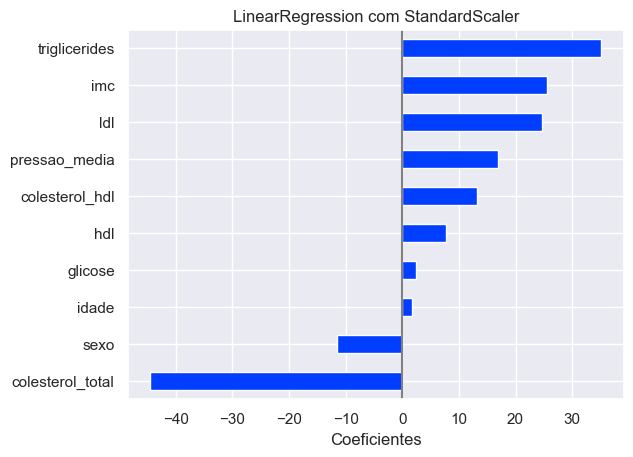

In [17]:
plot_coeficientes(coefs, titulo='LinearRegression com StandardScaler')

In [18]:
pipeline['scaler'].transform(X)

array([[ 0.7917738 ,  1.0613699 ,  1.2701279 , ..., -0.06221033,
         0.3913575 , -0.4043973 ],
       [-0.0718379 , -0.9421786 , -1.127127  , ..., -0.8354584 ,
        -1.4561754 , -1.9476647 ],
       [ 1.8124058 ,  1.0613699 ,  0.9048321 , ..., -0.06221033,
         0.03444809, -0.57587147],
       ...,
       [ 0.87028396,  1.0613699 , -0.37370417, ..., -0.24005738,
        -1.0070797 ,  0.2814994 ],
       [-1.0139598 , -0.9421786 ,  0.79067713, ...,  0.54865557,
         0.9068729 , -0.57587147],
       [-1.0139598 , -0.9421786 , -1.5837471 , ..., -0.8354584 ,
        -0.11385107,  0.02428813]], dtype=float32)

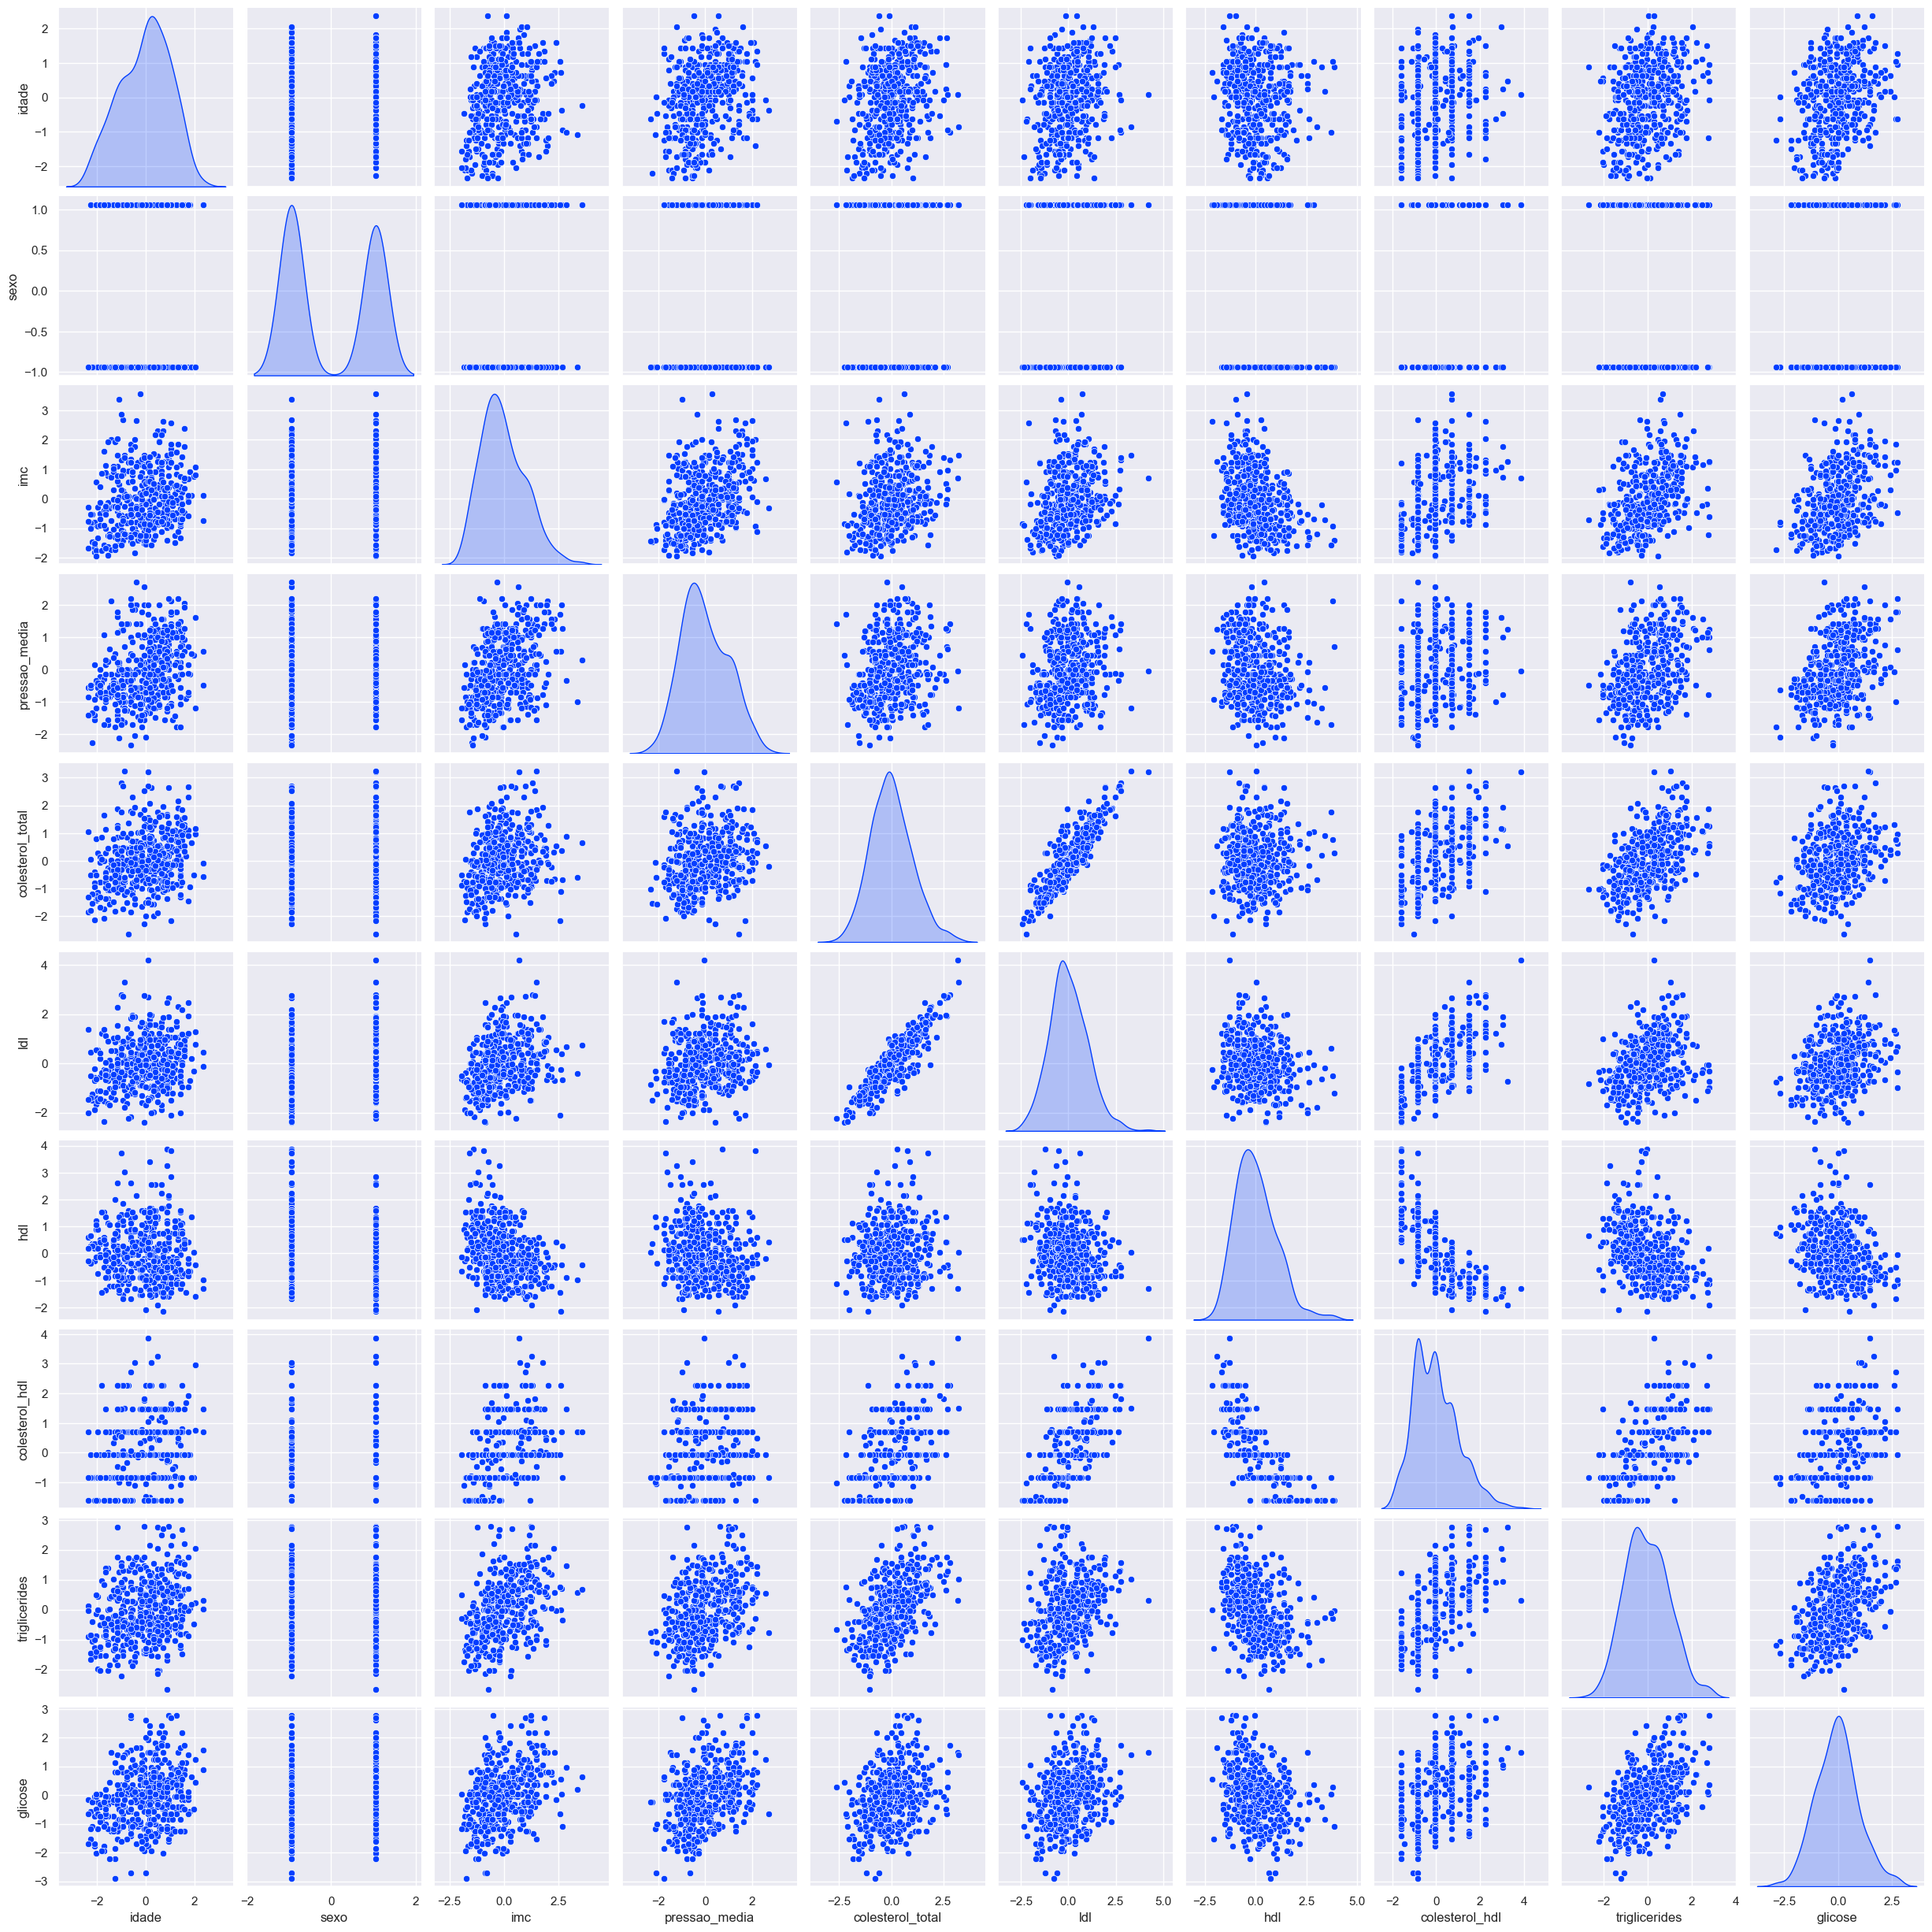

In [20]:
X_scaled = pipeline['scaler'].transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

sns.pairplot(X_scaled, diag_kind='kde')

In [21]:
X_scaled.mean()

idade              -0.031162
sexo               -0.003865
imc                -0.036766
pressao_media      -0.024367
colesterol_total    0.011641
ldl                 0.016946
hdl                 0.021053
colesterol_hdl     -0.007891
triglicerides      -0.025462
glicose            -0.039142
dtype: float32

In [22]:
X_scaled.std()

idade               1.029192
sexo                1.000895
imc                 1.008701
pressao_media       0.983864
colesterol_total    0.997925
ldl                 1.001164
hdl                 1.013668
colesterol_hdl      0.997838
triglicerides       0.997039
glicose             0.985662
dtype: float32

In [23]:
y_pred = pipeline.predict(X_test)

In [26]:
mean_absolute_error(y_test, y_pred)

np.float32(42.794098)

In [28]:
mean_squared_error(y_test, y_pred)

np.float32(2900.194)

In [29]:
root_mean_squared_error(y_test, y_pred)

np.float32(53.85345)

In [30]:
r2_score(y_test, y_pred)

0.452602744102478

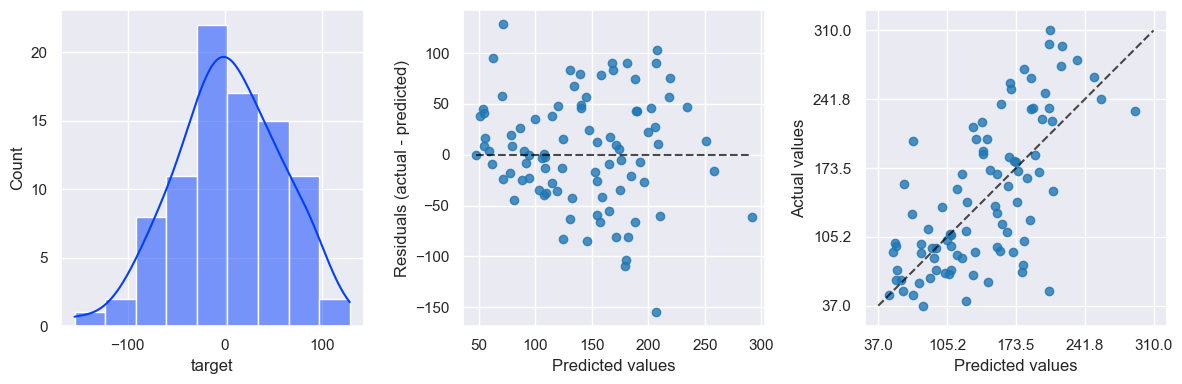

In [31]:
plot_residuos(y_test, y_pred)